In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

['job_skills.csv']


In [2]:
data_df = pd.read_csv('../input/job_skills.csv')
data_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [3]:
data_df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


In [4]:
data_df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [5]:
data_df.dropna(inplace=True)

split from location and create countrt column

In [6]:
data_df['country'] = data_df['Location'].apply(lambda x:x.split(',')[-1])
data_df['country'] = data_df['country'].apply(lambda y:y.replace(' ',''))
data_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


try to make top10 titles of top10 countries, but doesn't make sense.

it's better to make each country's(filter top10) top10 titles

In [ ]:
# data_df.Title.value_counts()[:10]

In [ ]:
# data_df.country.value_counts()[:10]

In [10]:
top10country = data_df.country.value_counts()[:10].index.tolist()
top10country

['UnitedStates',
 'Ireland',
 'UnitedKingdom',
 'Germany',
 'Singapore',
 'China',
 'Australia',
 'Japan',
 'Taiwan',
 'India']

In [ ]:
# top10country_df = data_df.loc[data_df['country'].isin(top10country)]
# top10country_df.head()

In [ ]:
# top10country_title = top10country_df.Title.value_counts()[:10].index.tolist()
# top10country_title_df = top10country_df.loc[top10country_df['Title'].isin(top10country_title)]
# top10country_title_df.head()

In [ ]:
# country_title = top10country_title_df.pivot_table(index=['country'], columns=['Title'], values=['Company'], aggfunc='count')
# country_title

In [ ]:
# country_title.plot(kind='bar', stacked=True, figsize=(12,8))

need to plot by single country to find the top10 title

In [13]:
def country_title_plot(country):
    country_df = data_df[data_df['country']==country]
    title = country_df['Title'].value_counts()[:10]
    title.plot(kind='bar')
    plt.title('{} top 10 titles'.format(country))
    plt.show()

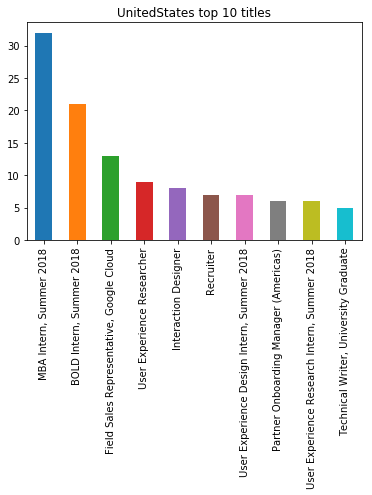

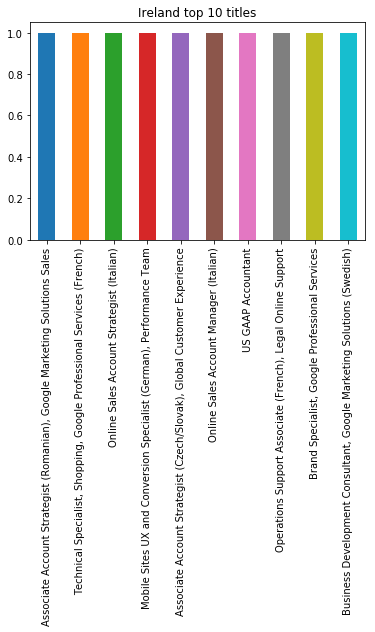

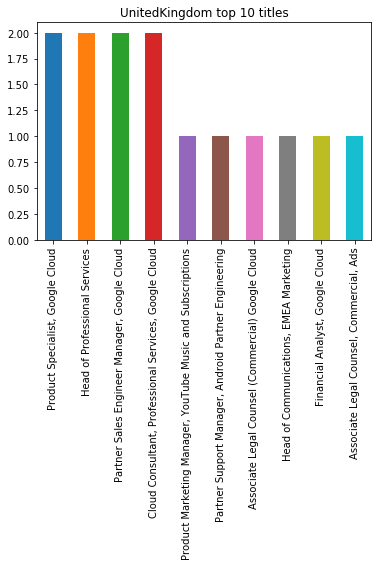

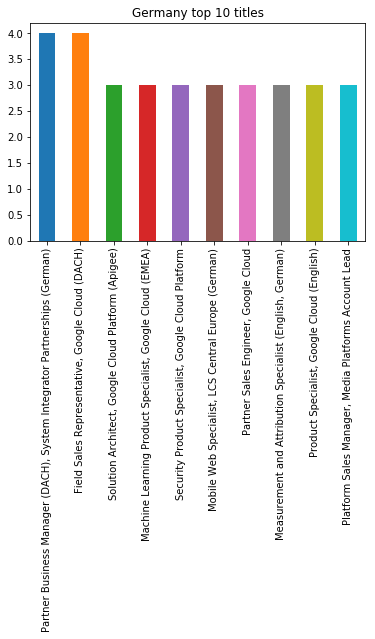

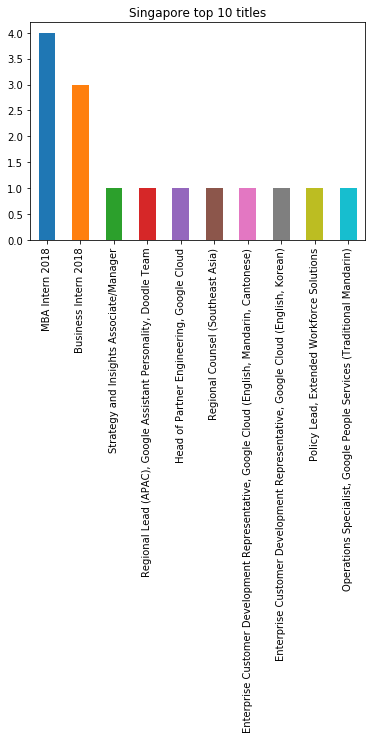

In [15]:
for i in top10country[:5]:
    country_title_plot(i)

taiwan -> china

In [16]:
new_df = data_df.copy()
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


3 ways to change the content in one column. replace in the simplest
```python
new_df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
```

In [17]:
# new_df.loc[new_df.country=='Taiwan', 'country'] = 'China'
# new_df['country'] = new_df['country'].apply(lambda x:'China' if x == 'Taiwan' else x)
new_df['country'].replace('Taiwan', 'China', inplace=True)

In [18]:
new_df.country.value_counts()[:5]

UnitedStates     624
Ireland           87
China             68
UnitedKingdom     62
Germany           53
Name: country, dtype: int64

regex to filter the required year of working experience

In [19]:
import re

In [23]:
# new_df['min_year_exp'] = new_df['Minimum Qualifications'].apply(lambda x : re.findall('([0-9]+)', x)) # 2018 2019?
new_df['min_year_exp'] = new_df['Minimum Qualifications'].apply(lambda x : re.findall('([0-9]+) year', x))
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country,min_year_exp
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates,[]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates,[4]


In [24]:
new_df['min_year_exp'] = new_df.min_year_exp.apply(lambda x : [0] if len(x)==0 else x)
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country,min_year_exp
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates,[0]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates,[4]


In [25]:
new_df['min_year_exp'] = new_df.min_year_exp.apply(lambda x: max(x))
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country,min_year_exp
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates,0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates,4


- ```sns.countplot()``` is **better than** ```value_counts().plot()```, beacuse sns shows axis without setting. 
- but sns doesn't sort data and will run as the order first in the column
- sns.distplot will fixed the above problem, axis go in sorted list

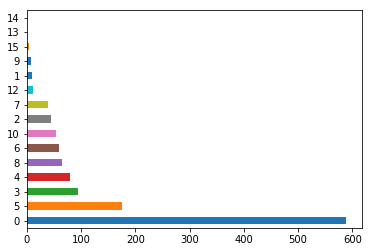

In [30]:
new_df.min_year_exp.value_counts().plot(kind='barh')

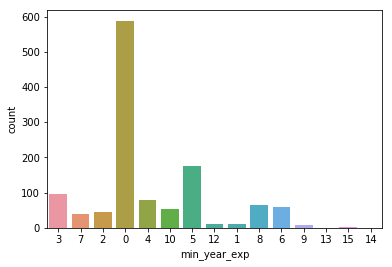

In [32]:
sns.countplot(new_df['min_year_exp'])

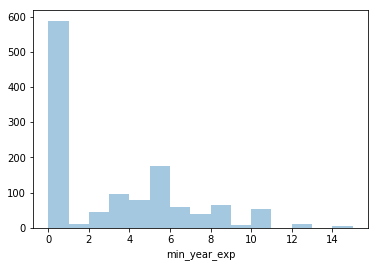

In [27]:
sns.distplot(new_df['min_year_exp'].astype('int'), bins=15, kde=False)

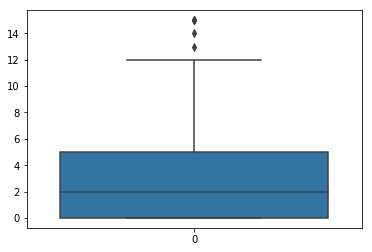

In [28]:
sns.boxplot(data=new_df['min_year_exp'].astype('int'))

degree

In [33]:
degree_list = ['BA', 'BS', 'Bachelor', 'MBA', 'Master', 'PhD']
# count_dict = {(x,0) for x in degree_list}
degree_dict = dict((x,0) for x in degree_list)
degree_dict

{'BA': 0, 'BS': 0, 'Bachelor': 0, 'MBA': 0, 'Master': 0, 'PhD': 0}

In [34]:
for degree in degree_list:
    count = new_df['Minimum Qualifications'].str.contains(degree).sum()
#     if degree in degree_list: # seems no need here
    degree_dict[degree] = count
degree_dict

{'BA': 908, 'BS': 878, 'Bachelor': 164, 'MBA': 71, 'Master': 81, 'PhD': 8}

In [39]:
for i in degree_dict.items():
    print(i, i[0], i[1])
print('-----'*10)
for key, value in degree_dict.items():
    print(key, value)

('BA', 908) BA 908
('BS', 878) BS 878
('Bachelor', 164) Bachelor 164
('MBA', 71) MBA 71
('Master', 81) Master 81
('PhD', 8) PhD 8
--------------------------------------------------
BA 908
BS 878
Bachelor 164
MBA 71
Master 81
PhD 8


In [40]:
degree_dict_list = [(i[0], i[1]) for i in degree_dict.items()]
degree_dict_list
# degree_df = pd.DataFrame(degree_dict)
# dict can not be created to df

[('BA', 908),
 ('BS', 878),
 ('Bachelor', 164),
 ('MBA', 71),
 ('Master', 81),
 ('PhD', 8)]

In [41]:
degree_df = pd.DataFrame(degree_dict_list, columns=['degree', 'count'])
# degree_df.set_index('degree', inplace=True) # if no inplace, it doesn't work
degree_df

,degree,count
0,BA,908
1,BS,878
2,Bachelor,164
3,MBA,71
4,Master,81
5,PhD,8


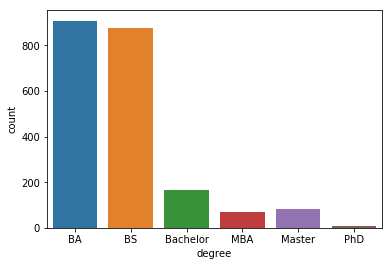

In [42]:
# sns.barplot(x=degree_df.degree, y=degree_df.count)
# TypeError: float() argument must be a string or a number, not 'method'

sns.barplot(x=degree_df.degree, y=degree_df['count']) 
# sns must set x and y, so shouldn't set_index

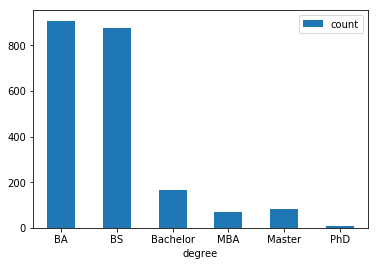

In [43]:
degree_df.set_index('degree', inplace=True) # if no inplace, it doesn't work
degree_df.plot(kind='bar', rot=0) # set_index and plt.plot

In [ ]:
# sort a dict

In [44]:
degree_dict.items()

dict_items([('BA', 908), ('BS', 878), ('Bachelor', 164), ('MBA', 71), ('Master', 81), ('PhD', 8)])

In [45]:
for item in degree_dict.items():
    print(item[1])

908
878
164
71
81
8


In [46]:
degree_requirement = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)
degree_requirement
# make a df and plot

[('BA', 908),
 ('BS', 878),
 ('Bachelor', 164),
 ('Master', 81),
 ('MBA', 71),
 ('PhD', 8)]

programm9ing language

In [47]:
language_list = ['Python', 'Java ', 'C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL', 'Go ']
# Google contains 'Go', so we need to set the key as 'Go '
language_dict = dict((x,0) for x in language_list)
language_dict

{'Python': 0,
 'Java ': 0,
 'C#': 0,
 'PHP': 0,
 'Javascript': 0,
 'Ruby': 0,
 'Perl': 0,
 'SQL': 0,
 'Go ': 0}

In [48]:
for language in language_list:
    count = new_df['Minimum Qualifications'].str.contains(language).sum()
    language_dict[language] = count
language_dict

{'Python': 96,
 'Java ': 10,
 'C#': 15,
 'PHP': 7,
 'Javascript': 3,
 'Ruby': 14,
 'Perl': 6,
 'SQL': 75,
 'Go ': 7}

we need to transform dict to a list anyway, so just sort a dict. because sorted dict will return s list

In [50]:
language_requirenment = sorted(language_dict.items(), key=lambda x:x[1], reverse=True)
language_requirenment

[('Python', 96),
 ('SQL', 75),
 ('C#', 15),
 ('Ruby', 14),
 ('Java ', 10),
 ('PHP', 7),
 ('Go ', 7),
 ('Perl', 6),
 ('Javascript', 3)]

In [ ]:
# language_dict_list = [(i[0], i[1]) for i in language_dict.items()]
# language_dict_list

In [51]:
language_df = pd.DataFrame(language_requirenment, columns=['language', 'count'])
language_df

,language,count
0,Python,96
1,SQL,75
2,C#,15
3,Ruby,14
4,Java,10
5,PHP,7
6,Go,7
7,Perl,6
8,Javascript,3


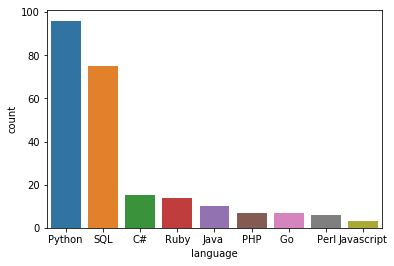

In [52]:
# sns.barplot(language_df[language], language_df[count])
# KeyError: 'Go '

# language_df['language'].replace(' ','', inplace=True)

# but this time successed!! without delete space' ' in 'Go '
sns.barplot(language_df['language'], language_df['count'])

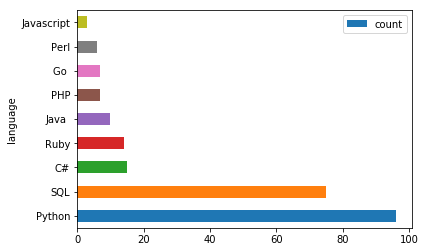

In [53]:
# language_df.plot(kind='bar')
language_df.plot.barh(x='language', y='count')

In [ ]:
# language_requirement = sorted(language_dict.items(), key=lambda item:item[1], reverse=True)
# language_requirement

wordcloud

for the key word in titles, plot [ Responsibilities, Minimum Qualifications, Preferred Qualifications]

In [54]:
from wordcloud import WordCloud

In [ ]:
# analyst_df = new_df.loc[new_df['Title'].str.contains('Analyst')]
# # new_df.loc[new_df['Title'].str.contains('Analyst').fillna(False)].head()
# print(analyst_df['Responsibilities'].tolist()[:2])

In [ ]:
# long_text = ' '.join(analyst_df['Responsibilities'].tolist())
# # combine all the element in the list with space ' ' to a paragraph 
# long_text

In [ ]:
# wordcloud = WordCloud().generate(long_text)
# plt.imshow(wordcloud)
# plt.axis('off')

In [60]:
wordcould_types = ['Responsibilities', 'Minimum Qualifications', 'Preferred Qualifications']

In [58]:
def plot_wordcloud(title, wordcould_types):
    for wordcould_type in wordcould_types:
        filtered_list = new_df[new_df['Title'].str.contains(title)][wordcould_type].tolist()
        long_lext = ' '.join(filtered_list)
        word_cloud = WordCloud().generate(long_lext)
        plt.imshow(word_cloud)
        plt.axis('off')
        plt.title('{} - {}'.format(title, wordcould_type))
        plt.show()

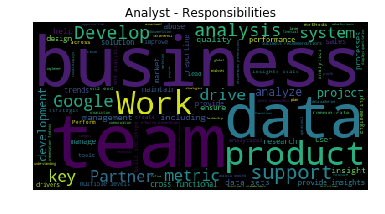

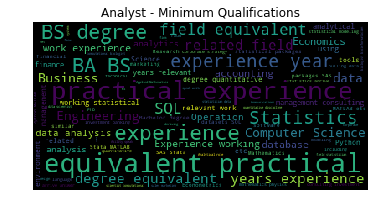

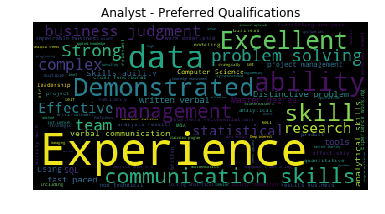

In [62]:
plot_wordcloud('Analyst', wordcould_types)

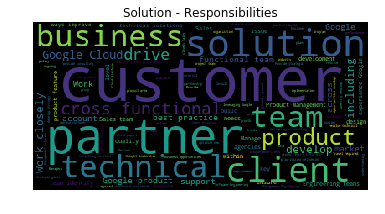

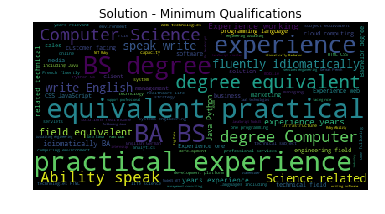

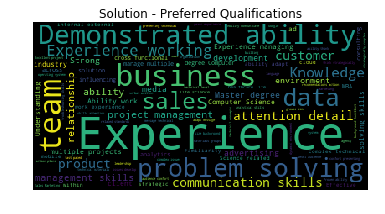

In [64]:
plot_wordcloud('Solution', wordcould_types)

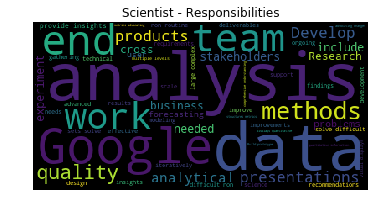

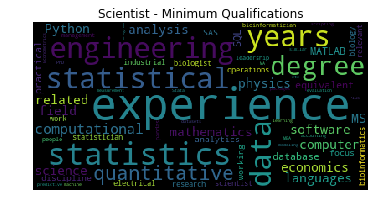

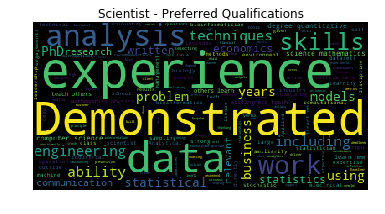

In [65]:
plot_wordcloud('Scientist', wordcould_types)